<a href="https://colab.research.google.com/github/KATTA-00/CO542-Neural-Networks-Labs/blob/main/lab07/E19129_lab07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CO542 - Neural Networks and Fuzzy Systems
## E/19/129 - K.H. Gunawardana

### Lab 07: Tensorflow

### Task 01: Linear Regression with TensorFlow

In [1]:
# TensorFlow and NumPy imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# For reproducibility
np.random.seed(42)
tf.random.set_seed(42)

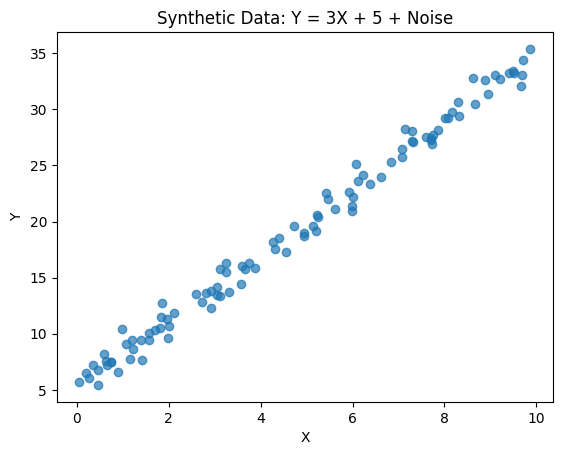

In [2]:
# Generate 100 data points
X = np.random.rand(100, 1) * 10  # values between 0 and 10
noise = np.random.normal(0, 1, (100, 1))  # Gaussian noise
Y = 3 * X + 5 + noise  # Y = 3x + 5 + noise

# Plot the data
plt.scatter(X, Y, alpha=0.7)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Synthetic Data: Y = 3X + 5 + Noise")
plt.show()

In [3]:
# Create a simple linear model using Keras Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,), activation='linear')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Compile the model with MSE loss and SGD optimizer
model.compile(optimizer='sgd', loss='mse')

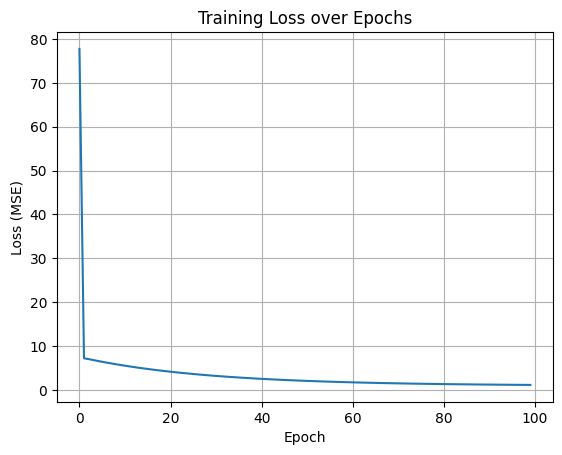

In [5]:
# Train the model for 100 epochs
history = model.fit(X, Y, epochs=100, verbose=0)

# Plot the loss over epochs
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training Loss over Epochs')
plt.grid(True)
plt.show()

In [6]:
# Get the learned weight and bias
weight, bias = model.layers[0].get_weights()
print(f"Learned weight: {weight[0][0]:.4f}")
print(f"Learned bias: {bias[0]:.4f}")

Learned weight: 3.1674
Learned bias: 4.3361


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


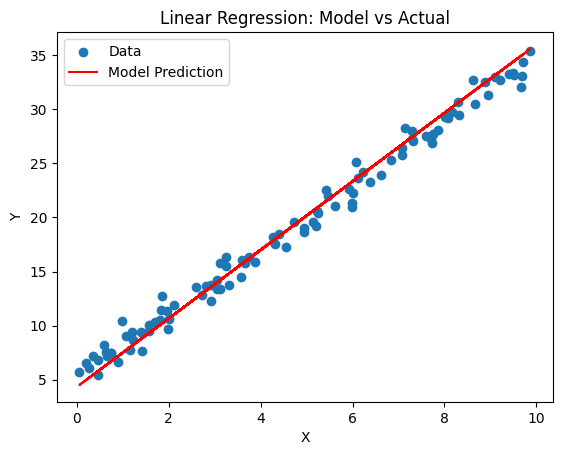

In [7]:
# Predict using the model
Y_pred = model.predict(X)

# Plot original data and model prediction
plt.scatter(X, Y, label='Data')
plt.plot(X, Y_pred, color='red', label='Model Prediction')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Linear Regression: Model vs Actual")
plt.show()

### Questions:

#### What are the learned weight and bias values?

- The learned weight is 3.1674 and the learned bias is 4.3361. These parameters were obtained after training the model on the synthetic dataset using a simple linear regression model implemented with TensorFlow.

#### How close is the learned model to the true equation?

In [8]:
# Calculate true Y (without noise) for the same X
Y_true = 3 * X + 5

# Predict Y using the trained model
Y_pred = model.predict(X)

# Compute Mean Absolute Error (MAE) and Mean Squared Error (MSE)
mae = np.mean(np.abs(Y_true - Y_pred))
mse = np.mean(np.square(Y_true - Y_pred))

print(f"Mean Absolute Error from true equation: {mae:.4f}")
print(f"Mean Squared Error from true equation: {mse:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Mean Absolute Error from true equation: 0.4414
Mean Squared Error from true equation: 0.2605


- The learned model is quite close to the true equation Y = 3x + 5. After training, the mean absolute error (MAE) between the model’s predictions and the true (noise-free) values is 0.4414, and the mean squared error (MSE) is 0.2605. These low error values indicate that the model has effectively captured the underlying linear relationship, despite the presence of Gaussian noise in the training data. Visually, the model’s prediction line aligns well with the actual data, showing that it has learned a reliable approximation of the true function.

#### How does increasing noise affect convergence?

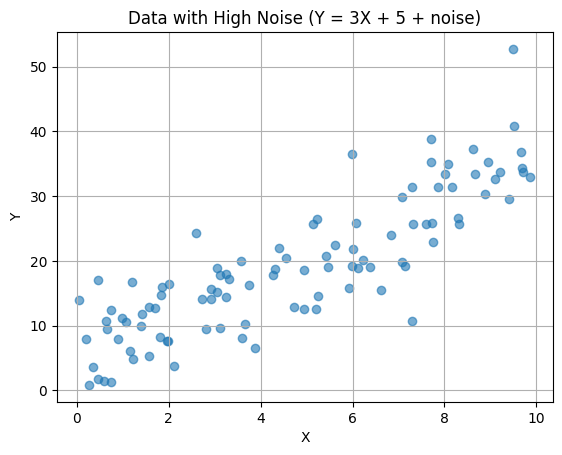

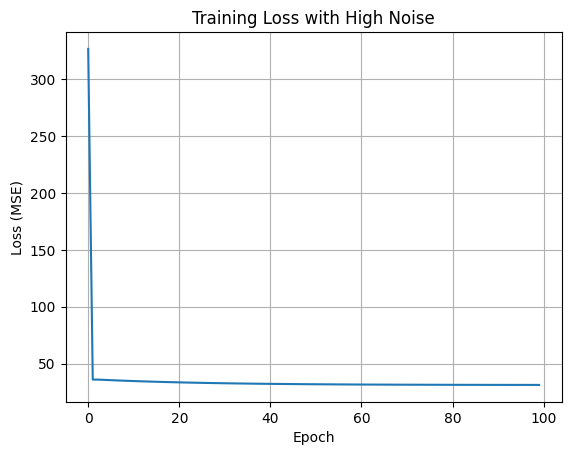

Learned weight: 3.2569
Learned bias: 4.7393
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Mean Absolute Error from true equation: 0.9793
Mean Squared Error from true equation: 1.4760


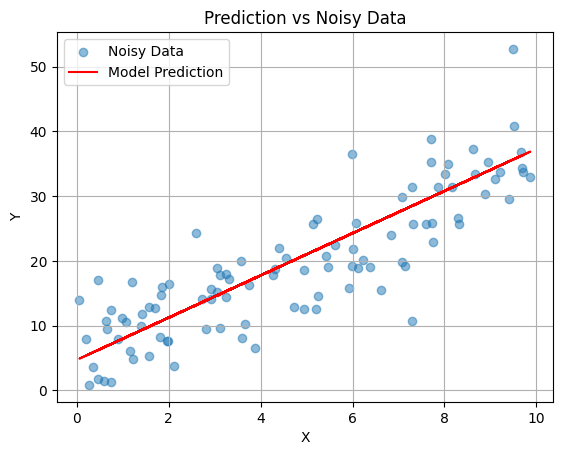

In [9]:
# Increase noise standard deviation to 5
noise = np.random.normal(0, 5, (100, 1))
Y = 3 * X + 5 + noise

# Plot noisy data
plt.scatter(X, Y, alpha=0.6)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Data with High Noise (Y = 3X + 5 + noise)")
plt.grid(True)
plt.show()

# Define and compile model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,), activation='linear')
])
model.compile(optimizer='sgd', loss='mse')

# Train the model
history = model.fit(X, Y, epochs=100, verbose=0)

# Plot training loss
plt.plot(history.history['loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss with High Noise")
plt.grid(True)
plt.show()

# Print learned parameters
weight, bias = model.layers[0].get_weights()
print(f"Learned weight: {weight[0][0]:.4f}")
print(f"Learned bias: {bias[0]:.4f}")

# Evaluate closeness to true function
Y_true = 3 * X + 5
Y_pred = model.predict(X)

mae = np.mean(np.abs(Y_true - Y_pred))
mse = np.mean(np.square(Y_true - Y_pred))

print(f"Mean Absolute Error from true equation: {mae:.4f}")
print(f"Mean Squared Error from true equation: {mse:.4f}")

# Plot predictions
plt.scatter(X, Y, label="Noisy Data", alpha=0.5)
plt.plot(X, Y_pred, color='red', label="Model Prediction")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Prediction vs Noisy Data")
plt.grid(True)
plt.show()

- When the noise level in the data is increased, the model's ability to accurately learn the underlying pattern deteriorates. In this case, with a higher noise standard deviation, the learned weight is 3.2569 and the bias is 4.7393, which deviate more from the true values of 3 and 5, respectively. The mean absolute error (MAE) increased to 0.9793 and the mean squared error (MSE) rose to 1.4760, indicating that the model's predictions are now less accurate compared to the lower-noise scenario.

- This demonstrates that higher noise makes it harder for the model to converge to the correct solution. The optimizer struggles to distinguish between actual trends and random fluctuations in the data, leading to more variability in training and less precise parameter estimates. Additionally, the loss curve during training may appear less smooth and convergence might slow down or plateau earlier.

### Task 02: Classification on IRIS Dataset